In [1]:
from NDFunctionInterface import PrepareData, Fitter
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
v0sPanda = pd.read_csv('../TTreeHnInteractive/v0all.csv',sep='\t', index_col=False )

Use PrepareData to split the sample into trainings and test sample and to assign features and target. The last parameter can be either contain a split as a probability ([0.3]) or a tuple ([1000,1000]) for splitting the sample.

In [3]:
x = PrepareData(v0sPanda, ['fRr', 'mpt', 'tglV0', 'pointAngleN', 'dcaNorm'],['cleanK0'], [10000,10000])

Register the Fitter. For the Fitter, different methods can be registeres, bootstrapping can be done and also compression.

In [4]:
fitter = Fitter(x)

In [5]:
fitter.Register_Method('KM','KerasModel', 'Classifier', layout = [10,10],epochs = 1, batchsize = 10)
fitter.Register_Method('RF','RandomForest', 'Classifier', n_estimators=100, max_depth=10)
fitter.Register_Method('RF200','RandomForest', 'Classifier', n_estimators=200, max_depth=10)

With Fit the Registered Models are trained:

In [6]:
fitter.Fit()

Epoch 1/1
10000/10000 [==============================] - 1s 92us/step - loss: 1.0746 - acc: 0.8273


A fitted Method can be compressed via:

In [7]:
fitter.Compress('RF')

Epoch 1/3
10000/10000 [==============================] - 0s 30us/step - loss: 0.9292 - mean_squared_error: 3.0464
Epoch 2/3
10000/10000 [==============================] - 0s 16us/step - loss: 0.1541 - mean_squared_error: 0.1023
Epoch 3/3
10000/10000 [==============================] - 0s 15us/step - loss: 0.0444 - mean_squared_error: 0.0128


You can plot the ROCs of the test sample via:

('AUC of method KM : ', 0.635965906083781)
('AUC of method RF : ', 0.857621637579719)
('AUC of method RF200 : ', 0.859976613564794)
('AUC of method RF_Compressed : ', 0.6228000790573976)


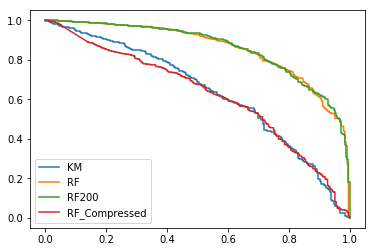

In [8]:
fitter.PlotRocs()

Bootstrapping can be done via:

In [9]:
fitter.Bootstrap('RFBS', 'RandomForest', 'Classifier', 0.5, 3)

Train sample 0
Train sample 1
Train sample 2


/home2/miranov/.virtualenvs/our_new_env/local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The output can be appended to your Pandas DF test sample via:

In [10]:
out = fitter.AppendPandas('RF','Test_sample')

In [11]:
out.head()

,fRr,mpt,tglV0,isBackground,cleanV0,cleanK0,cleanL,cleanAL,cleanEl,K0Pull,...,pointAngleN,fDcaV0Daughters,dcaNorm,alphaV0S,armV0S,alphaV0,armV0,ntracks,medianM/D,RF
966579,107.907349,1.494971,0.787478,1,0,0,0,0,0,-170.020587,...,0.139703,0.005945,0.003305,0.325433,0.007905,0.333480,0.007862,159,10037,0.000738
444382,24.238764,0.522784,-0.021626,1,0,0,0,0,0,-429.325542,...,0.166677,0.003227,0.002860,-0.062857,0.020462,-0.076986,0.020919,2717,10089,0.012512
648846,1.594087,0.983162,-0.366978,0,0,0,0,0,0,-24.567750,...,0.031061,0.020773,0.014813,-0.676115,0.023075,-0.686636,0.022877,3764,9934,0.079852
109379,16.644354,1.995905,-0.167933,1,0,0,0,0,0,-277.516849,...,0.299139,0.470342,0.210688,-0.108576,0.023648,-0.138258,0.024550,11339,10083,0.000651
776723,31.815857,0.323999,0.573335,1,0,0,0,0,0,-14.111778,...,0.148407,0.105161,0.100041,-0.756361,0.100560,-0.710871,0.104521,10208,9934,0.035247


It can also be appended to any other data frame:

In [12]:
out2 = fitter.AppendOtherPandas('RF',v0sPanda)

In [13]:
out2.head()

,fRr,mpt,tglV0,isBackground,cleanV0,cleanK0,cleanL,cleanAL,cleanEl,K0Pull,...,pointAngleN,fDcaV0Daughters,dcaNorm,alphaV0S,armV0S,alphaV0,armV0,ntracks,medianM/D,RF
0,31.400881,1.555499,-0.182620,0,1,0,0,0,1,-168.712141,...,0.014258,0.439017,0.237408,-0.400927,0.001245,-0.382490,0.001209,10010,10083,0.016650
1,29.216007,0.245828,0.979247,0,0,0,0,0,0,1.531672,...,0.123246,0.010450,0.010148,-0.705526,0.116301,-0.688880,0.119970,10010,10083,0.050624
2,16.743244,2.191736,0.922424,1,0,0,0,0,0,-106.798676,...,0.506353,0.040642,0.016870,-0.452961,0.048990,-0.452822,0.048695,10010,10083,0.000428
3,80.708542,0.233575,0.484057,1,0,0,0,0,0,-62.115930,...,0.643713,0.063328,0.061668,0.352686,0.054713,0.337873,0.053507,9639,10083,0.016873
4,3.364810,0.705705,-0.213805,0,1,0,0,1,0,-1.744585,...,0.018675,0.027421,0.022404,-0.778093,0.093901,-0.756984,0.097985,9639,10083,0.173808
